# Supervised Learning - Foundations: ShowTime

## Problem Statement

### Context

An over-the-top (OTT) media service is a media service offered directly to viewers via the internet. The term is most synonymous with subscription-based video-on-demand services that offer access to film and television content, including existing series acquired from other producers, as well as original content produced specifically for the service. They are typically accessed via websites on personal computers, apps on smartphones and tablets, or televisions with integrated Smart TV platforms.

Presently, OTT services are at a relatively nascent stage and are widely accepted as a trending technology across the globe. With the increasing change in customers' social behavior, which is shifting from traditional subscriptions to broadcasting services and OTT on-demand video and music subscriptions every year, OTT streaming is expected to grow at a very fast pace. The global OTT market size was valued at 121.61 billion dollars in 2019 and is projected to reach 1,039.03 billion dollars by 2027, growing at a CAGR of 29.4% from 2020 to 2027. The shift from television to OTT services for entertainment is driven by benefits such as on-demand services, ease of access, and access to better networks and digital connectivity.

With the outbreak of COVID19, OTT services are striving to meet the growing entertainment appetite of viewers, with some platforms already experiencing a 46% increase in consumption and subscriber count as viewers seek fresh content. With innovations and advanced transformations, which will enable the customers to access everything they want in a single space, OTT platforms across the world are expected to increasingly attract subscribers on a concurrent basis.

### Objective

ShowTime is an OTT service provider and offers a wide variety of content (movies, web shows, etc.) for its users. They want to determine the driver variables for first-day content viewership so that they can take necessary measures to improve the viewership of the content on their platform. Some of the reasons for the decline in viewership of content would be the decline in the number of people coming to the platform, decreased marketing spend, content timing clashes, weekends and holidays, etc. They have hired you as a Data Scientist, shared the data of the current content in their platform, and asked you to analyze the data and come up with a linear regression model to determine the driving factors for first-day viewership.

### Data Dictionary

The data contains the different factors to analyze for the content. The detailed data dictionary is given below.


- visitors: Number of visitors, in millions, to the platform in the past week
- ad_impressions: Number of ad impressions, in millions, across all ad campaigns for the content (running and completed)
- major_sports_event: Any major sports event on the day
- genre: Genre of the content
- dayofweek: Day of the release of the content
- season: Season of the release of the content
- views_trailer: Number of views, in millions, of the content trailer
- views_content: Number of first-day views, in millions, of the content

## **Please read the instructions carefully before starting the project.**

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned.

* Blanks '_______' are provided in the notebook that need to be filled with an appropriate code to get the correct result

* With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space

* Identify the task to be performed correctly and only then proceed to write the required code

* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code"

* Running incomplete code may throw an error

* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors

* Add the results/observations derived from the analysis in the presentation and submit the same in .pdf format

## Importing necessary libraries and data

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 -q --user

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the data

In [5]:
# loading data
data = pd.read_csv('ottdata (1).csv') ## Load OTT dataset into a DataFrame for analysis

## Data Overview

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Displaying the first few rows of the dataset

In [6]:
# Display the first 5 rows to preview the dataset structure
data.head() # Retrieve the first 5 rows of the dataset

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46


### Checking the shape of the dataset

In [7]:
data.shape ## Retrieve the dimensions of the dataset (rows, columns)

(1000, 8)

### Checking the data types of the columns for the dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


### Checking the data types of the columns for the dataset

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


### Statistical summary of the dataset

In [11]:
data.describe().round(2) # Generate a statistical summary of the dataset

,visitors,ad_impressions,major_sports_event,views_trailer,views_content
count,1000.00,1000.00,1000.00,1000.00,1000.00
mean,1.70,1434.71,0.40,66.92,0.47
std,0.23,289.53,0.49,35.00,0.11
min,1.25,1010.87,0.00,30.08,0.22
25%,1.55,1210.33,0.00,50.95,0.40
50%,1.70,1383.58,0.00,53.96,0.45
75%,1.83,1623.67,1.00,57.76,0.52
max,2.34,2424.20,1.00,199.92,0.89


### Checking for missing values

In [12]:
data.isnull().sum() ## Check for missing values

visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64

## Exploratory Data Analysis

In [13]:
# create a copy of the data to avoid any changes to original data
df = data.copy()  # create a copy of data

### Univariate Analysis

In [14]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**`views_content`**

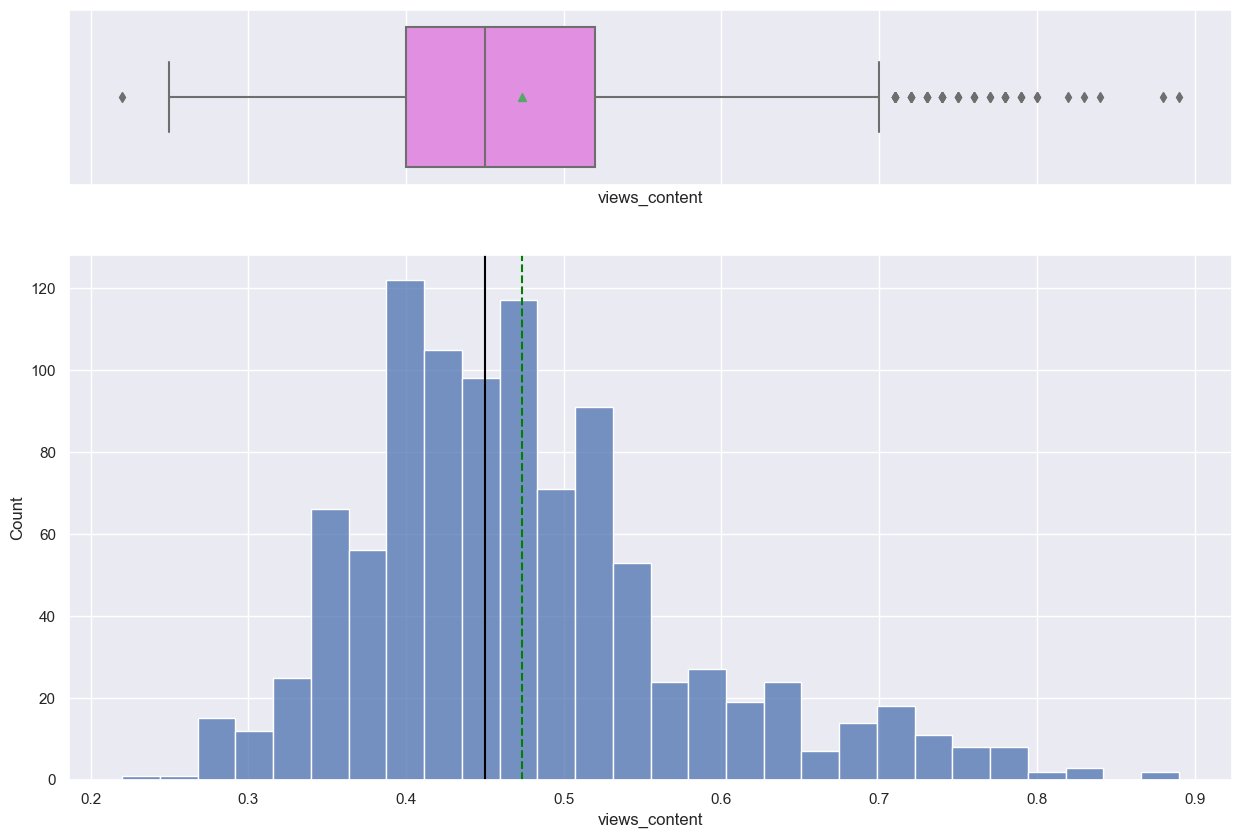

In [15]:
histogram_boxplot(df, "views_content") # boxplot for views_content using dataframe

**`visitors`**

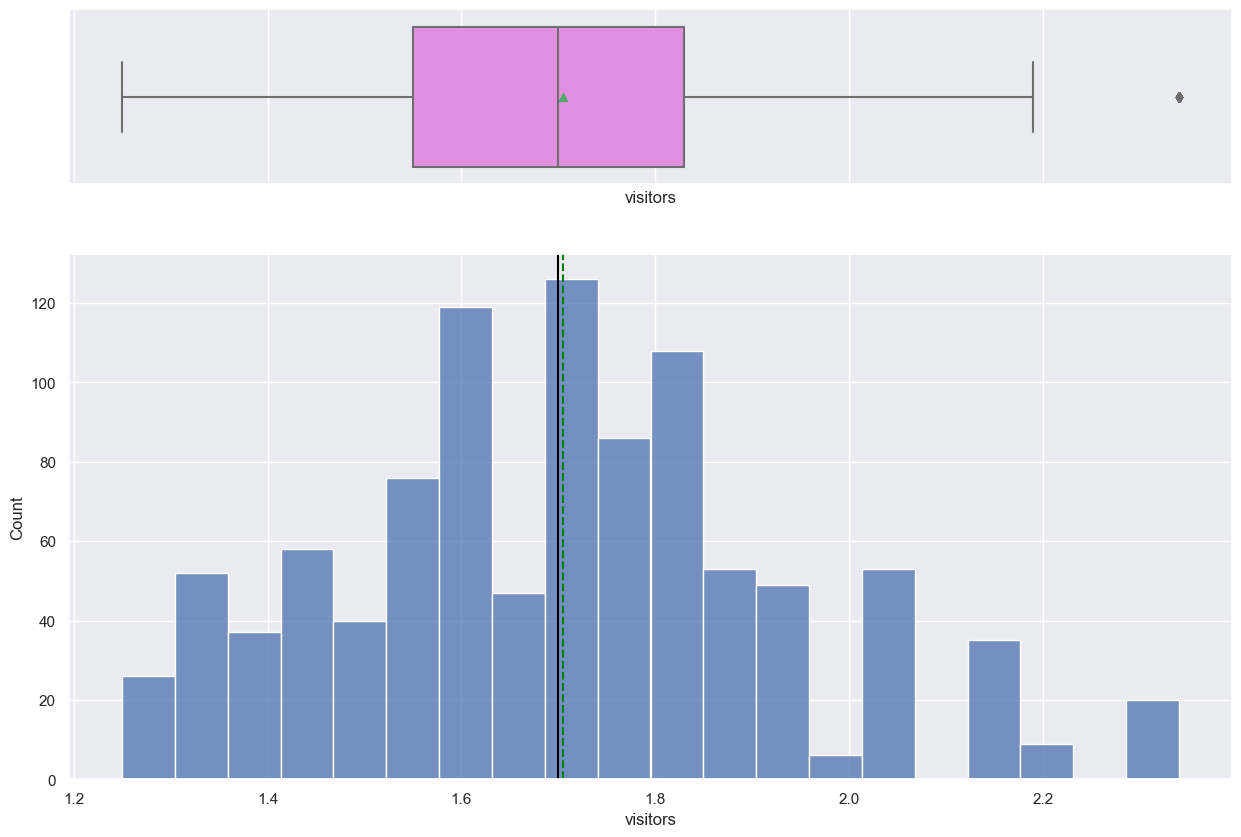

In [16]:
histogram_boxplot(df, "visitors")   ## Plot histogram and boxplot for 'visitors' to analyze distribution and outliers

**`ad_impressions`**

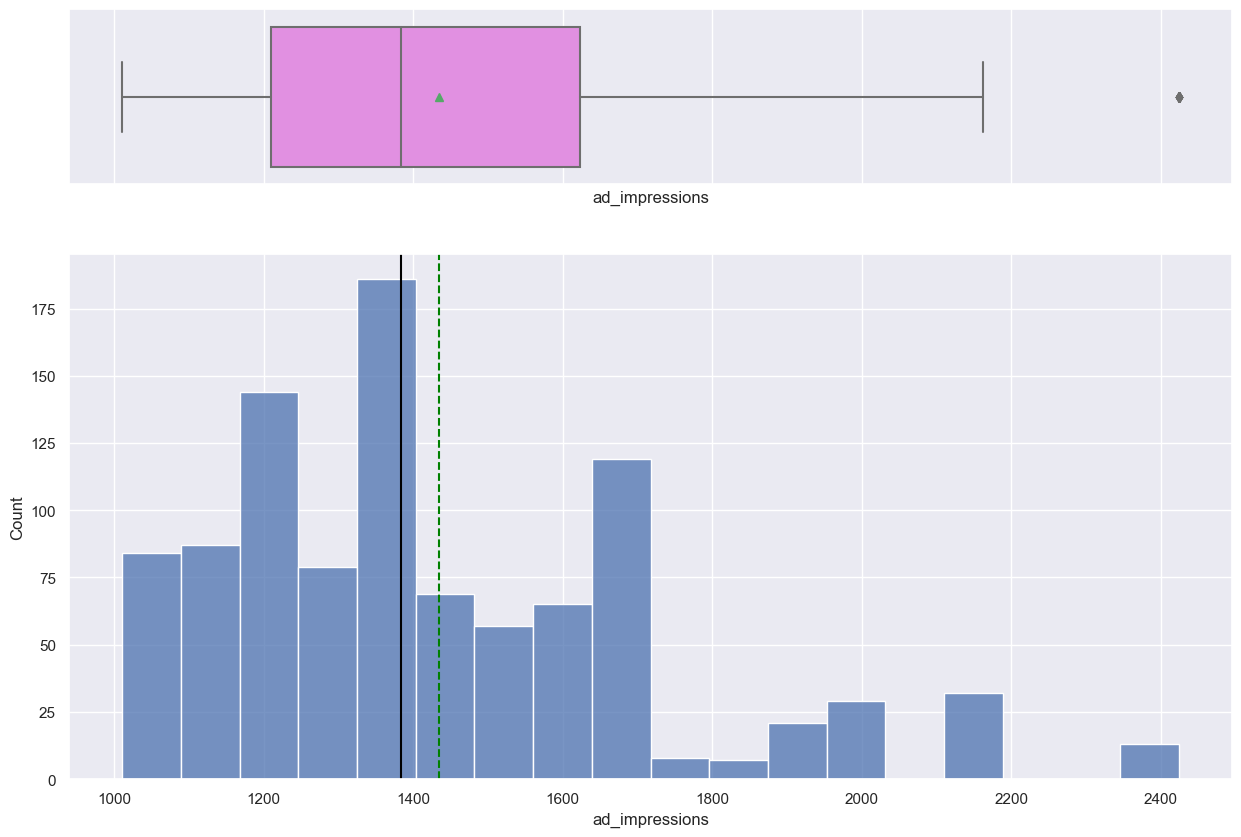

In [17]:
histogram_boxplot(df, "ad_impressions")  ## Plot histogram and boxplot for 'ad_impressions' to analyze distribution and outliers

**`views_trailer`**

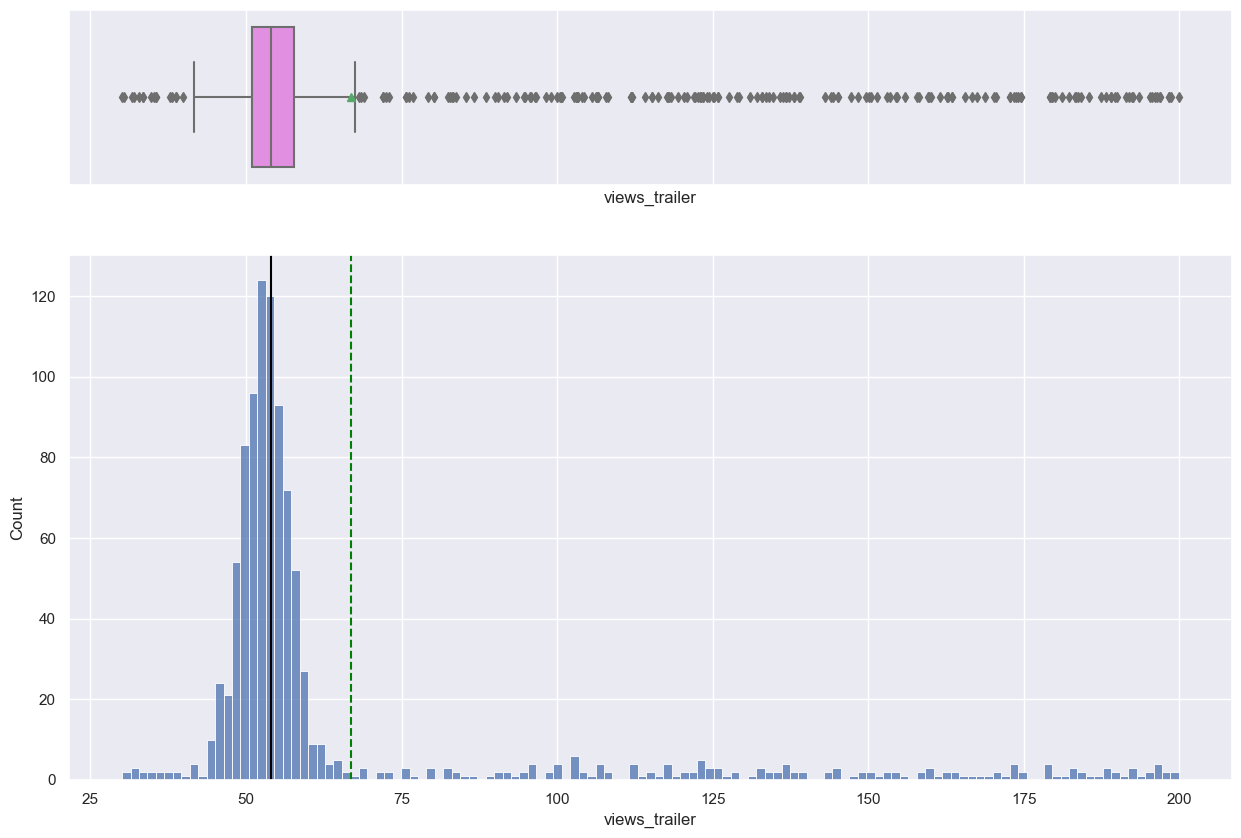

In [18]:
histogram_boxplot(df, "views_trailer")  ## Visualizing the distribution and outliers of 'views_trailer' before transformation

In [19]:
df["views_trailer_log"] = np.log(df["views_trailer"])   ## Apply log transformation to normalize skewed trailer view data

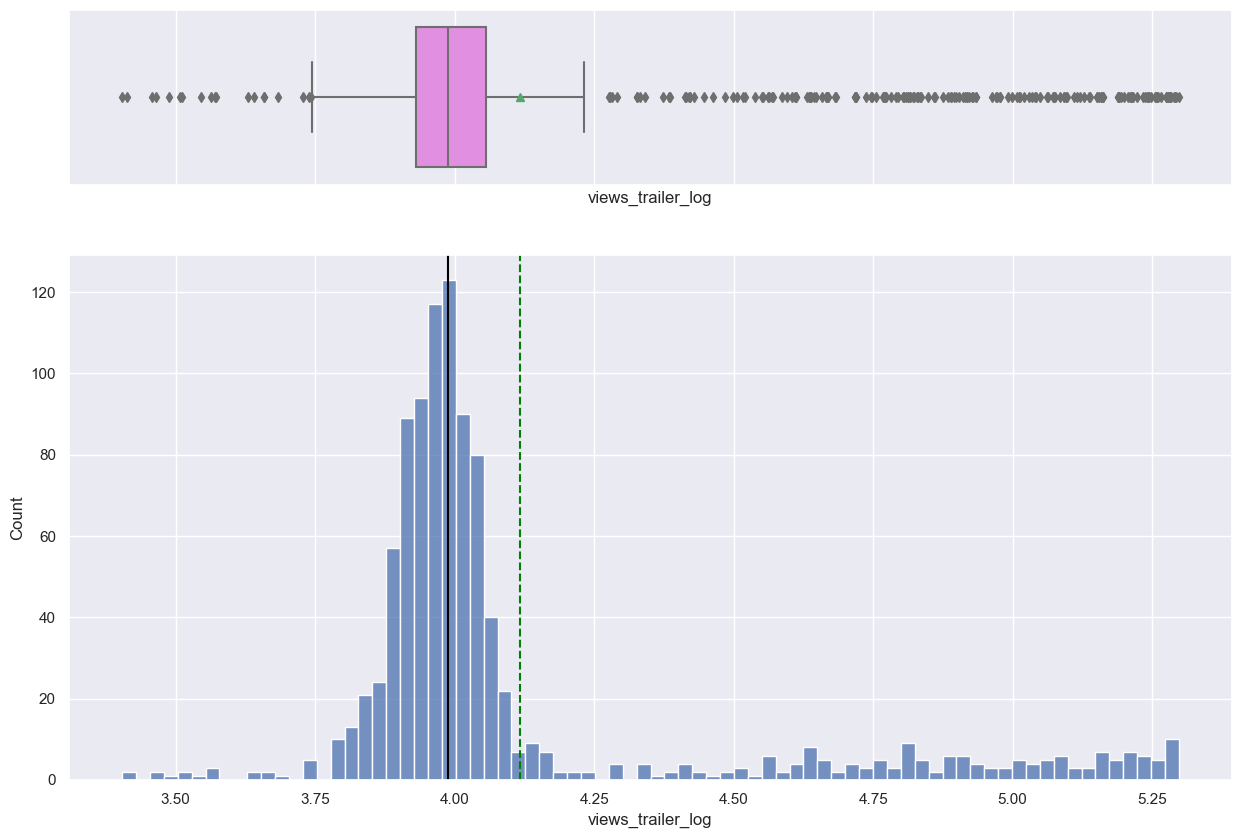

In [20]:
histogram_boxplot(df, "views_trailer_log")  ## Visualize the transformed 'views_trailer_log' distribution after log scaling

In [21]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`major_sports_event`**

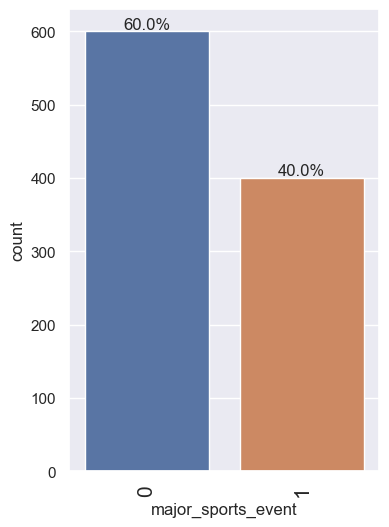

In [23]:
labeled_barplot(df, "major_sports_event", perc=True) # barplot for major_sports_event

**`genre`**

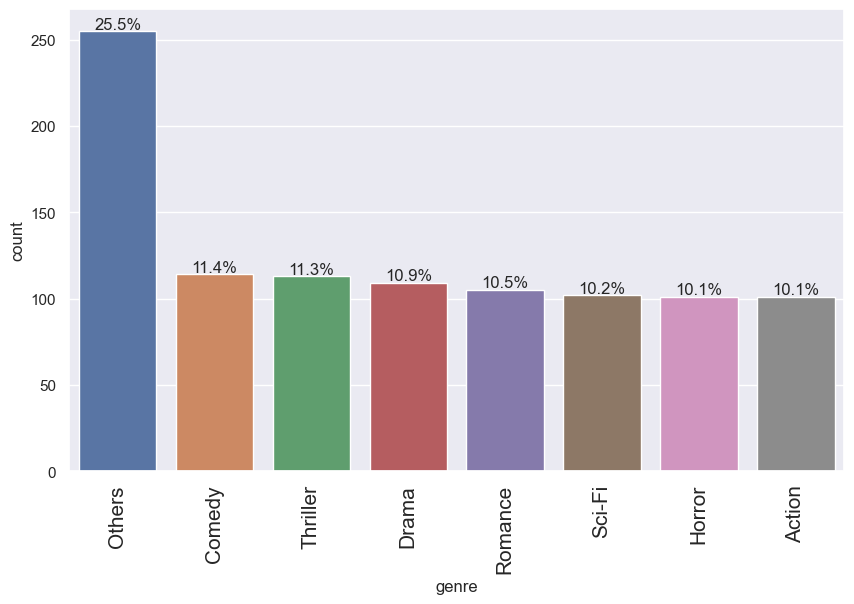

In [24]:
# Visualizing the distribution of content genres with labeled bar plot, showing percentages
labeled_barplot(df, "genre", perc=True)   ## Create a bar plot for 'genre' with percentage labels to analyze genre distribution

**`dayofweek`**

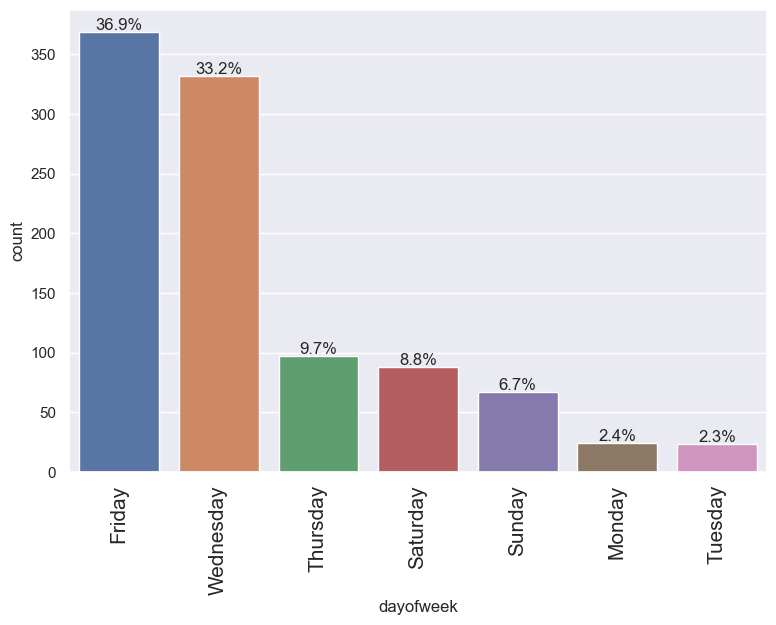

In [25]:
labeled_barplot(df, "dayofweek", perc=True)   ## Create a bar plot for 'dayofweek' with percentage labels to analyze release patterns

**`season`**

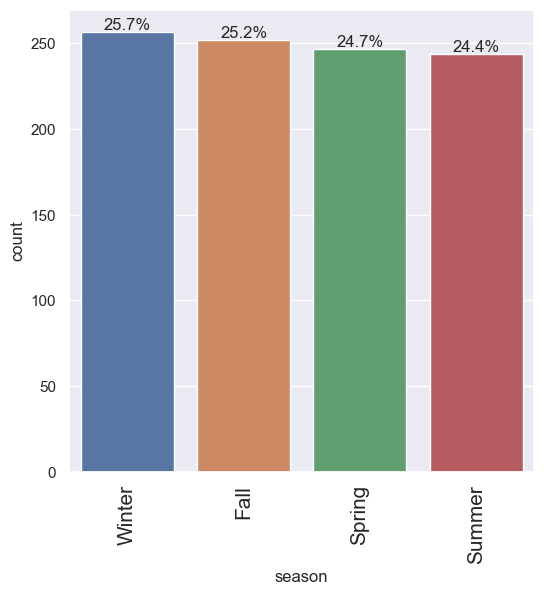

In [22]:
labeled_barplot(df, "season", perc=True)    ## Create a bar plot for 'season' with percentage labels to analyze seasonal release trends

### Bivariate Analysis


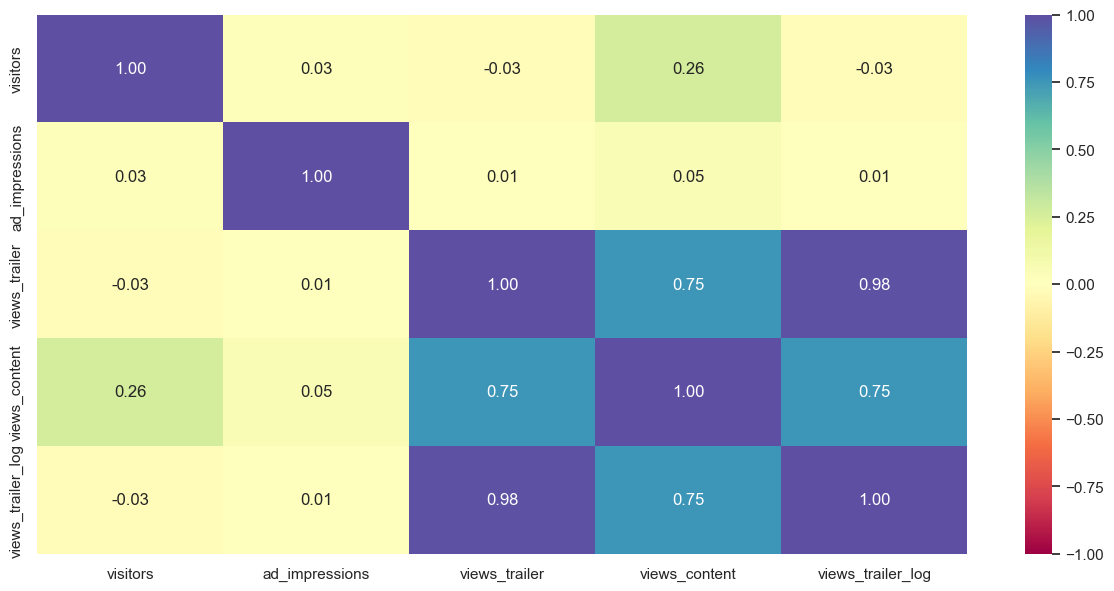

In [26]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping major_sports_event as it is nominal in nature
cols_list.remove("major_sports_event")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

<AxesSubplot:xlabel='major_sports_event', ylabel='views_content'>

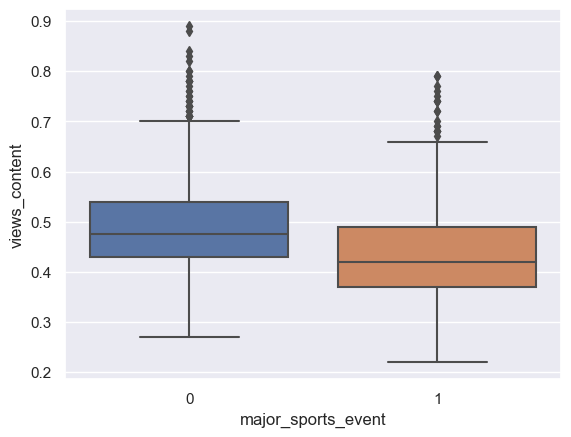

In [27]:
# checking the relation of content view with major sport events
sns.boxplot(data=df, x="major_sports_event", y="views_content")

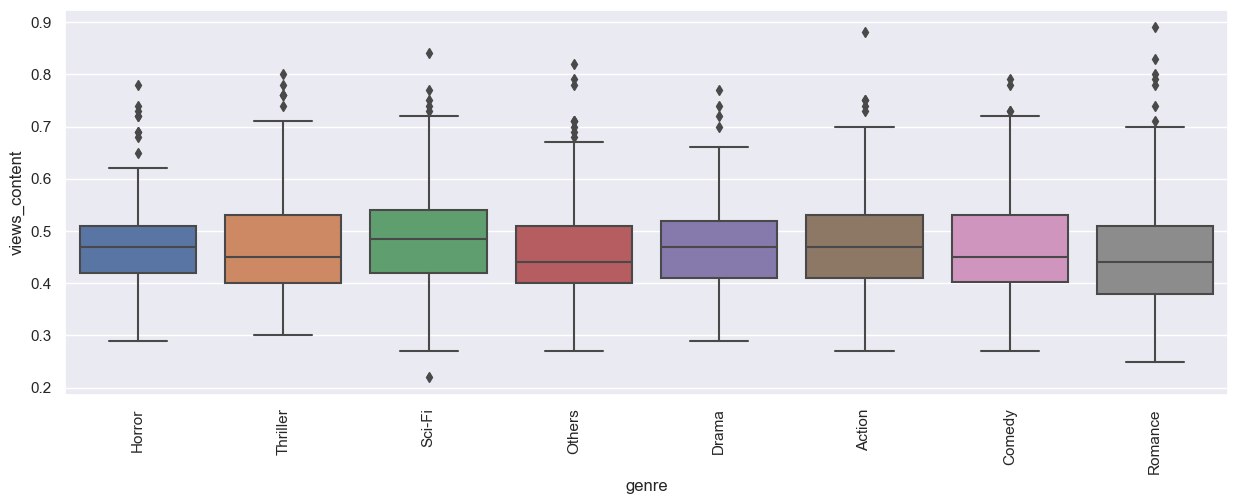

In [28]:
# checking the relation of content view with genre
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="genre", y="views_content") # plot barplot for genre and views_content
plt.xticks(rotation=90)
plt.show()

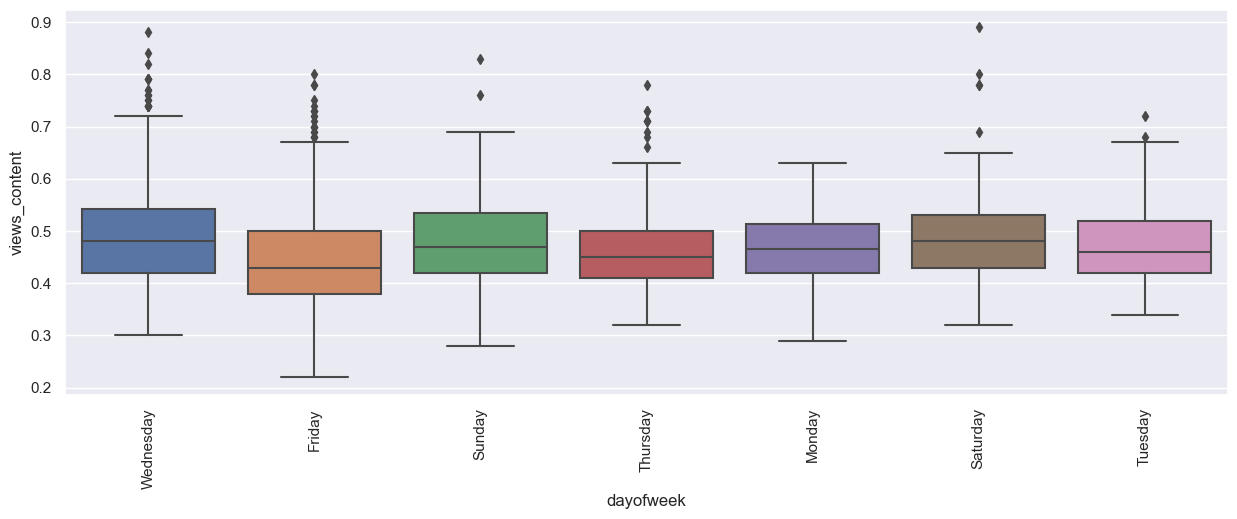

In [29]:
# checking the relation of content view with day of the week
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="dayofweek", y="views_content") # plot barplot for dayofweek and views_content
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='season', ylabel='views_content'>

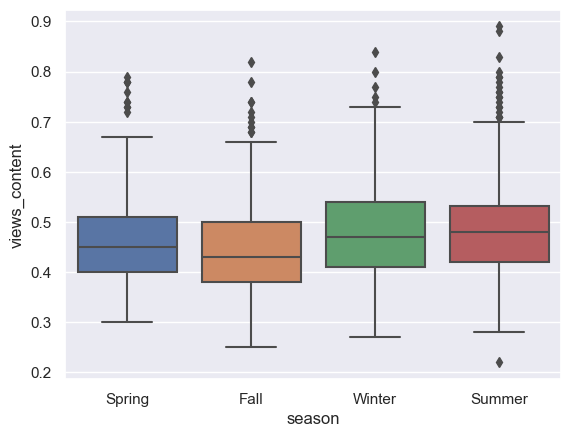

In [30]:
# checking the relation of content view with season
sns.boxplot(data=df, x="season", y="views_content") # plot barplot for season and views_content

## Data Preprocessing

**We will replace the 0 and 1 in `major_sports_event` by '*No*' and '*Yes*' respectively.**

In [31]:
df["major_sports_event"] = df["major_sports_event"].replace({0: "No", 1: "Yes"})
df.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content,views_trailer_log
0,1.67,1113.81,No,Horror,Wednesday,Spring,56.70,0.51,4.037774
1,1.46,1498.41,Yes,Thriller,Friday,Fall,52.69,0.32,3.964426
2,1.47,1079.19,Yes,Thriller,Wednesday,Fall,48.74,0.39,3.886500
3,1.85,1342.77,Yes,Sci-Fi,Friday,Fall,49.81,0.44,3.908216
4,1.46,1498.41,No,Sci-Fi,Sunday,Winter,55.83,0.46,4.022311


### Outlier Check

- Let's check for outliers in the data.

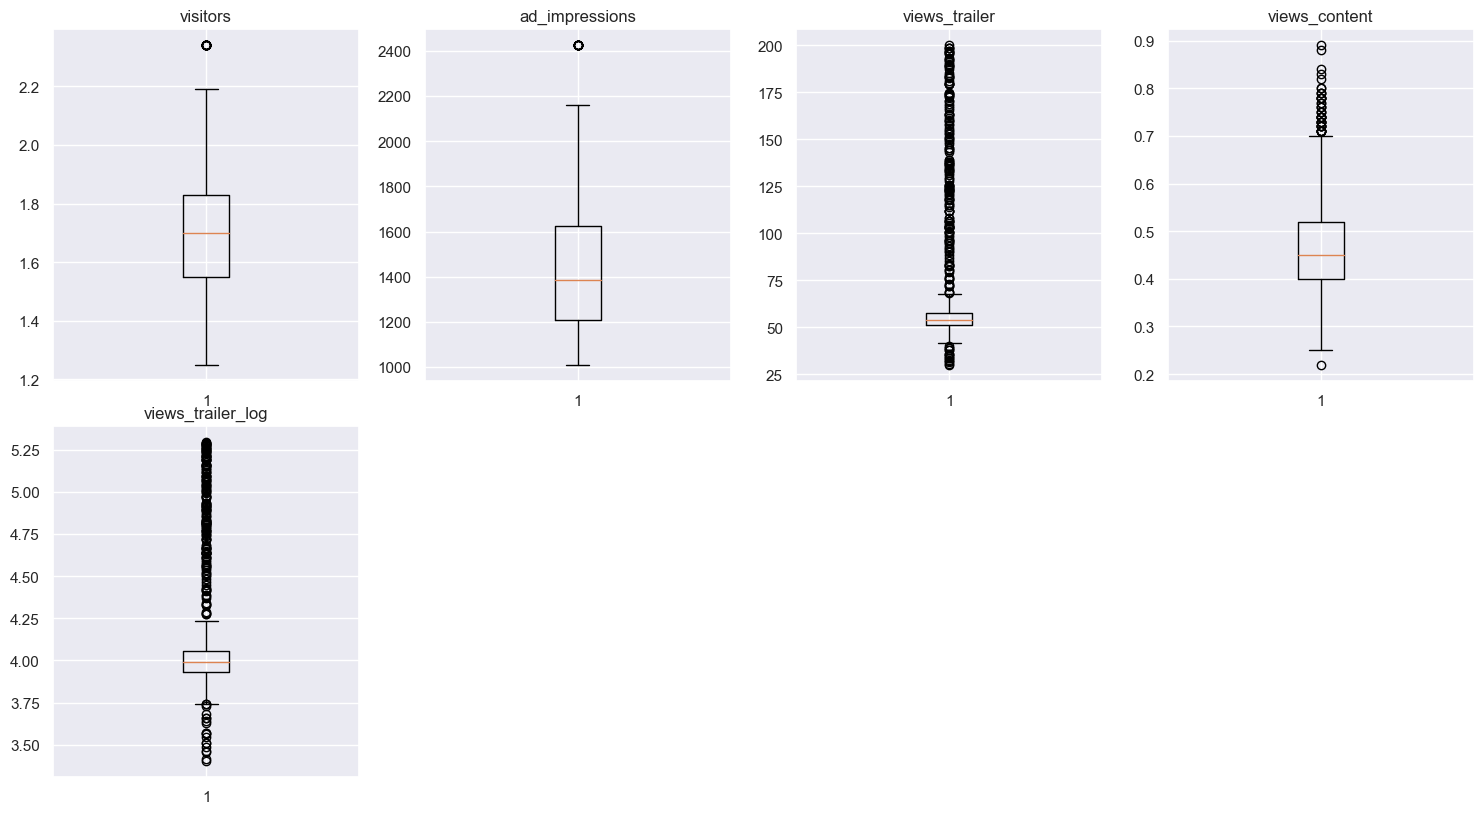

In [32]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Data Preparation for modeling

- We want to determine the driving factors behind first-day viewership, so we will use `views_content` as our target variable.
- We will drop the log-transformed version of the number of trailer views.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [33]:
# defining the dependent and independent variables
X = df.drop(["views_trailer_log", "views_content"], axis=1)
y = df["views_content"] # define the dependent (target) variable

print(X.head())
print(y.head())

   visitors  ad_impressions major_sports_event     genre  dayofweek  season  \
0      1.67         1113.81                 No    Horror  Wednesday  Spring   
1      1.46         1498.41                Yes  Thriller     Friday    Fall   
2      1.47         1079.19                Yes  Thriller  Wednesday    Fall   
3      1.85         1342.77                Yes    Sci-Fi     Friday    Fall   
4      1.46         1498.41                 No    Sci-Fi     Sunday  Winter   

   views_trailer  
0          56.70  
1          52.69  
2          48.74  
3          49.81  
4          55.83  
0    0.51
1    0.32
2    0.39
3    0.44
4    0.46
Name: views_content, dtype: float64


In [34]:
#  add the intercept to data
X = sm.add_constant(X)

In [35]:
# Converting categorical variables into dummy/one-hot encoded variables for modeling
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,const,visitors,ad_impressions,views_trailer,major_sports_event_Yes,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.0,1.67,1113.81,56.70,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
1,1.0,1.46,1498.41,52.69,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.0,1.47,1079.19,48.74,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1.0,1.85,1342.77,49.81,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,1.46,1498.41,55.83,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [36]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) ## Complete the code to split the data into train and test in specified ratio

In [37]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0]) # print number of rows in test set

Number of rows in train data = 700
Number of rows in test data = 300


## Model Building - Linear Regression

In [38]:
# Fitting an Ordinary Least Squares (OLS) regression model to predict first-day viewership
olsmodel1 = sm.OLS(y_train, x_train).fit()  ## fit OLS regression model
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     128.1
Date:                Fri, 28 Feb 2025   Prob (F-statistic):          7.57e-215
Time:                        12:30:13   Log-Likelihood:                 1125.0
No. Observations:                 700   AIC:                            -2208.
Df Residuals:                     679   BIC:                            -2112.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

## Model performance evaluation

Let's check the model performance.

- We will be using metric functions defined in sklearn for RMSE and MAE.
- We will define a function to calculate MAPE.

In [39]:
# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [40]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train) # check the performance on train data
olsmodel1_train_perf

Training Performance



,RMSE,MAE,MAPE
0,0.048505,0.038387,8.488261


In [41]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test, y_test) # check the performance on test data
olsmodel1_test_perf

Test Performance



,RMSE,MAE,MAPE
0,0.051254,0.040974,9.300334


**Observations**


## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

- We will test for multicollinearity using VIF.

- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [44]:
checking_vif(x_train)  ## check VIF on train data

,feature,VIF
0,const,101.827024
1,visitors,1.027679
2,ad_impressions,1.017804
3,views_trailer,1.026218
4,major_sports_event_Yes,1.054040
5,genre_Comedy,1.935706
6,genre_Drama,1.958954
7,genre_Horror,2.035410
8,genre_Others,2.832436
9,genre_Romance,1.994811


### Removing Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [45]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [46]:
col_list = ["column_name1", "column_name2"] ## specify the columns with high VIF

res = treating_multicollinearity(x_train, y_train, col_list)  ## check the effect on model performance after dropping specified columns from train data
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,column_name1,0.784361,0.049249
1,column_name2,0.784361,0.049249


In [47]:
col_to_drop = "column_name" ## specify the column to drop
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]  ##  specify the train data from which to drop the column specified
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]  ## specify the test data from which to drop the column specified

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  column_name


,feature,VIF
0,const,101.827024
1,visitors,1.027679
2,ad_impressions,1.017804
3,views_trailer,1.026218
4,major_sports_event_Yes,1.054040
5,genre_Comedy,1.935706
6,genre_Drama,1.958954
7,genre_Horror,2.035410
8,genre_Others,2.832436
9,genre_Romance,1.994811


### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [48]:
# initial list of columns
predictors = x_train.copy()  ## check for p-values on the right dataset
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'visitors', 'views_trailer', 'major_sports_event_Yes', 'dayofweek_Monday', 'dayofweek_Saturday', 'dayofweek_Sunday', 'dayofweek_Thursday', 'dayofweek_Tuesday', 'dayofweek_Wednesday', 'season_Spring', 'season_Summer', 'season_Winter']


In [49]:
x_train2 = x_train[selected_features]
x_test2 = x_test[selected_features]

In [50]:
olsmodel2 = sm.OLS(y_train, x_train2).fit() #  fit OLS model
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     212.4
Date:                Fri, 28 Feb 2025   Prob (F-statistic):          8.78e-222
Time:                        12:37:07   Log-Likelihood:                 1120.2
No. Observations:                 700   AIC:                            -2214.
Df Residuals:                     687   BIC:                            -2155.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [51]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train2, y_train)
olsmodel2_train_perf

Training Performance



,RMSE,MAE,MAPE
0,0.048837,0.038388,8.491721


In [52]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test2, y_test) # get model performance on test set
olsmodel2_test_perf

Test Performance



,RMSE,MAE,MAPE
0,0.051139,0.041154,9.365748


**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE

- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [54]:
# create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train ## store the actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
541,0.44,0.492251,-0.052251
440,0.73,0.730406,-0.000406
482,0.35,0.439278,-0.089278
422,0.41,0.431052,-0.021052
778,0.48,0.482216,-0.002216


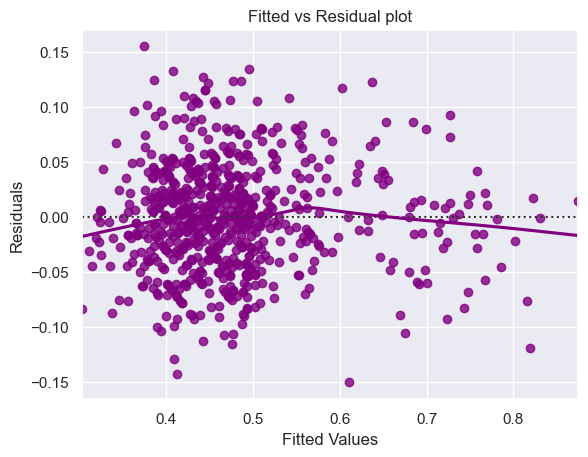

In [55]:
#  plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

### TEST FOR NORMALITY

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

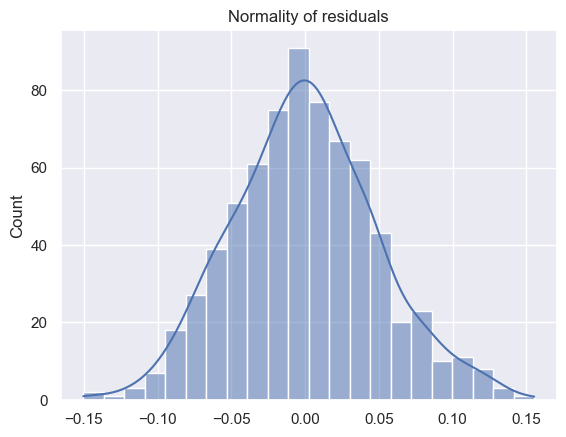

In [56]:
# check for normality
sns.histplot(olsmodel2.resid, kde=True)
plt.title("Normality of residuals")
plt.show()

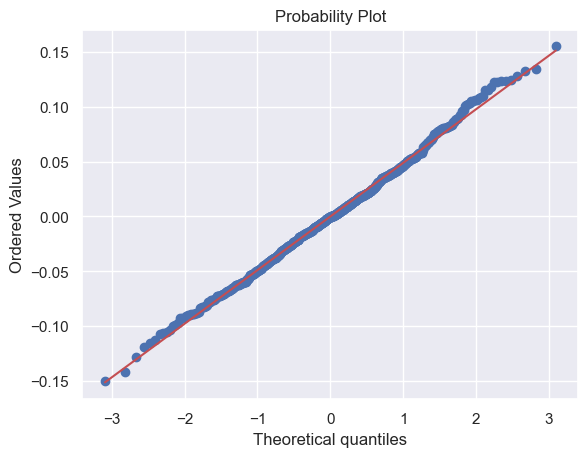

In [57]:
import pylab
import scipy.stats as stats

stats.probplot(olsmodel2.resid, dist="norm", plot=pylab)  ## check Q-Q plot
plt.show()

In [58]:
stats.shapiro(olsmodel2.resid) # fill the blank to check p-value

ShapiroResult(statistic=0.9970189332962036, pvalue=0.22689586877822876)

### TEST FOR HOMOSCEDASTICITY

- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [59]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(olsmodel2.resid, olsmodel2.model.exog) ## check homoscedasticity
lzip(name, test)

[('F statistic', 1.019245249011619), ('p-value', 0.430603262653949)]

## Final Model Summary

In [60]:
olsmodel_final = sm.OLS(y_train, x_train2).fit() # fit the final model
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     212.4
Date:                Fri, 28 Feb 2025   Prob (F-statistic):          8.78e-222
Time:                        12:42:54   Log-Likelihood:                 1120.2
No. Observations:                 700   AIC:                            -2214.
Df Residuals:                     687   BIC:                            -2155.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [62]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(olsmodel_final, x_train2, y_train) # check the performance on train data
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,MAPE
0,0.048837,0.038388,8.491721


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(olsmodel_final, x_test2, y_test) # check the performance on train data
olsmodel_final_test_perf

##  Actionable Insights and Recommendations

-  